In [39]:
import os
from glob import glob
import json
import seaborn as sns
import pandas as pd

from melody_alignment import Melody

In [5]:
irb_chord_progressions_filepath = '../data/chord_progressions/irb_chord_progressions.json'
wdb_chord_progressions_filepath = '../data/chord_progressions/weimar_db.json'
manual_chord_progressions_filepath = '../data/chord_progressions/manual_chord_progressions.json'

chord_progressions = {}
chord_progressions.update(json.load(open(irb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(wdb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(manual_chord_progressions_filepath)))

In [7]:
def manually_set_starting_measure(fp, starting_measure):
    melody = Melody(fp)
    key = os.path.join(melody.source, melody.filename)
    
    melody.setup()
    
    if melody.song_name not in chord_progressions:
        melody.errors.append('No chords!')
    
    if melody.time_signature is None:
        return 'No Time Signature!'
    
    if melody.time_signature[0] != 4:
        return 'Time signature Not 4/4'
    
    melody.set_song_structure(chord_progressions[melody.song_name])
    melody.align_key()
    melody.parse_notes()

    melody.starting_measure = starting_measure
    
    melody.split_melody()

In [9]:
alignment = json.load(open('../data/alignment_scores/alignment-09-02-2022-21-20-09.json'))

In [10]:
errors = json.load(open('../data/alignment_scores/errors-09-02-2022-21-20-09.json'))

In [37]:
bad = [(k,v) for k, v in alignment.items() if v['remainder'] > 6 or v['starting_measure'] > 10]

In [38]:
[v[0] for v in bad]

['Real Book/A Felicidade.mid',
 'Real Book/A Night In Tunisia.mid',
 'Real Book/Accentuate The Positive.mid',
 'Real Book/Airegin.mid',
 'Real Book/All Or Nothing At All.mid',
 "Real Book/Bags' Groove.mid",
 'Real Book/Just The Way You Look Tonight.mid',
 'Real Book/Lady Is A Tramp.mid',
 'Real Book/Lazybird.mid',
 "Real Book/Lulu's Back In Town.mid",
 'Real Book/Make Someone Happy.mid',
 'Real Book/Margie.mid',
 'Real Book/Embraceable You.mid',
 'Real Book/Falling Grace.mid',
 'Real Book/Fly Me To The Moon.mid',
 'Real Book/Fools Rush In.mid',
 'Real Book/Recado Bossa Nova.mid',
 'Real Book/Secret Love.mid',
 'Real Book/Shiny Stockings.mid',
 'Real Book/Speak Low.mid',
 'Real Book/Blue In Green.mid',
 'Real Book/Blue Monk.mid',
 'Real Book/Blue Train.mid',
 'Real Book/Daahoud.mid',
 'Real Book/Dancing On The Ceiling.mid',
 'Real Book/Dearly Beloved.mid',
 'Real Book/Black Orpheus.mid',
 'Real Book/Speak No Evil.mid',
 "Real Book/I Can't Give You Anything But Love.mid",
 "Real Book/I D

In [44]:
df = pd.read_json(open('../data/alignment_scores/alignment-09-02-2022-21-20-09.json')).T

In [53]:
df[(df['remainder'] > 3) & (df['starting_measure'] > 3)]

,cp_m,n_m,reps,remainder,starting_measure,songname
Real Book/A Felicidade.mid,49,179,3,32,75,A Felicidade
Real Book/A Night In Tunisia.mid,80,111,1,31,34,A Night In Tunisia
Real Book/Airegin.mid,36,112,3,4,28,Airegin
Real Book/Anthropology.mid,32,102,3,6,6,Anthropology
Real Book/Bags' Groove.mid,12,76,6,4,16,Bags' Groove
Real Book/Beautiful Friendship.mid,32,101,3,5,4,Beautiful Friendship
Real Book/Lulu's Back In Town.mid,24,100,4,4,26,Lulu's Back In Town
Real Book/Make Someone Happy.mid,38,128,3,14,4,Make Someone Happy
Real Book/Margie.mid,16,101,6,5,18,Margie
Real Book/Embraceable You.mid,32,101,3,5,32,Embraceable You


/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

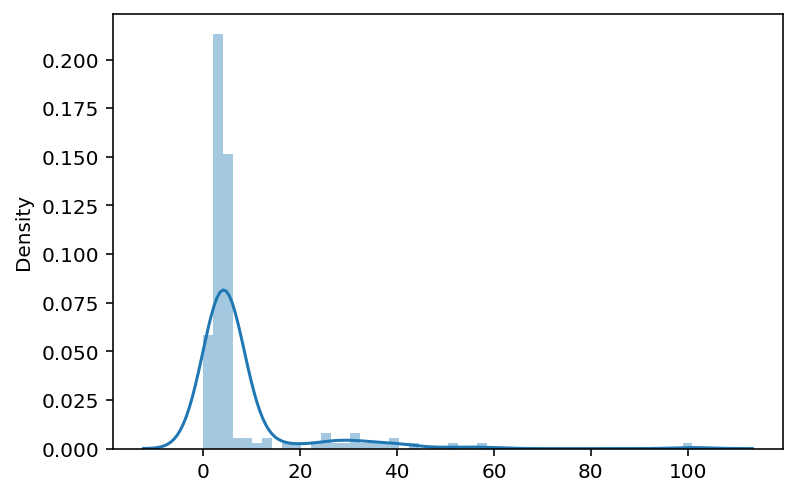

In [18]:
sns.distplot([v['remainder'] for j,v in alignment.items()])

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

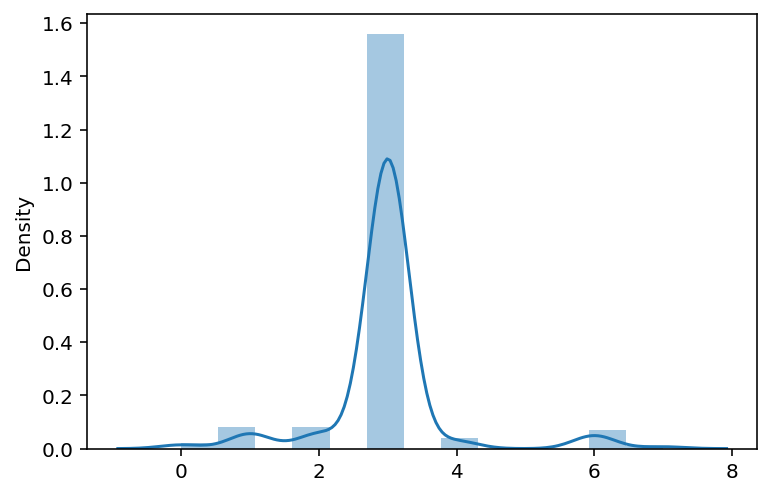

In [19]:
sns.distplot([v['reps'] for j,v in alignment.items()])

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

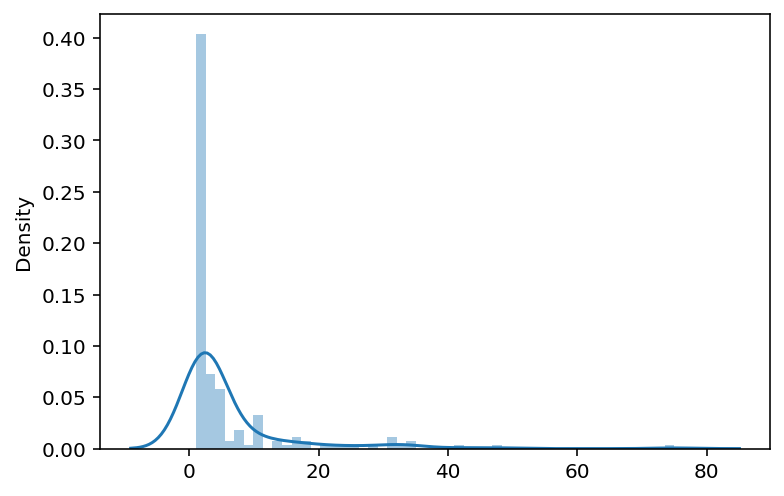

In [20]:
sns.distplot([v['starting_measure'] for j,v in alignment.items()])